In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) th6at gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant/restaurants.csv


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
     

In [3]:
# load dataframe
df = pd.read_csv('/kaggle/input/restaurant/restaurants.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# check for null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# remove null value rows
df= df.dropna()

In [6]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.shape

(9542, 21)

In [8]:

# drop features that inhibit model building
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)
     

In [9]:
print(df.describe())

       Average Cost for two  Price range  Aggregate rating         Votes
count           9542.000000  9542.000000       9542.000000   9542.000000
mean            1200.326137     1.804968          2.665238    156.772060
std            16128.743876     0.905563          1.516588    430.203324
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.500000      5.000000
50%              400.000000     2.000000          3.200000     31.000000
75%              700.000000     2.000000          3.700000    130.000000
max           800000.000000     4.000000          4.900000  10934.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9542 non-null   int64  
 1   Has Table booking     9542 non-null   object 
 2   Has Online delivery   9542 non-null   object 
 3   Is delivering now     9542 non-null   object 
 4   Switch to order menu  9542 non-null   object 
 5   Price range           9542 non-null   int64  
 6   Aggregate rating      9542 non-null   float64
 7   Rating color          9542 non-null   object 
 8   Rating text           9542 non-null   object 
 9   Votes                 9542 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 820.0+ KB


In [11]:

# encode the yes-no labels of categorical features into binary (1 for yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])

In [12]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


In [13]:
df.shape

(9542, 10)

<Axes: ylabel='count'>

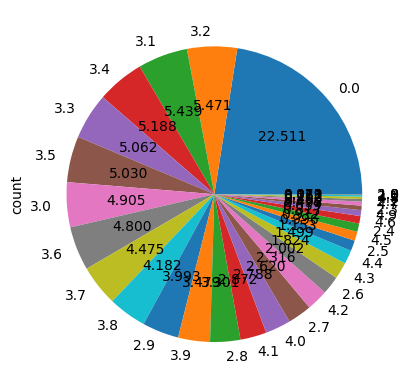

In [14]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.3f')

<ipython-input-15-00528cf33232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Aggregate rating', ylabel='Density'>

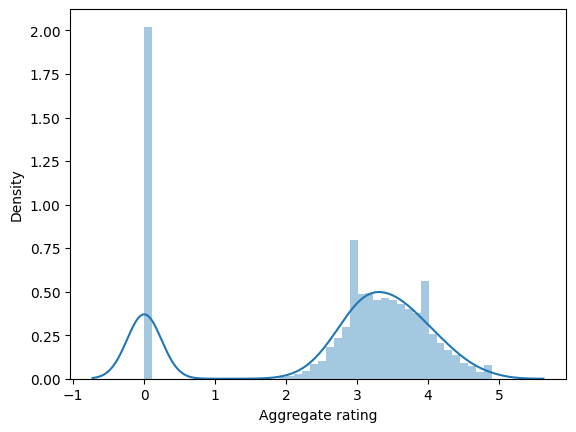

In [15]:
sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

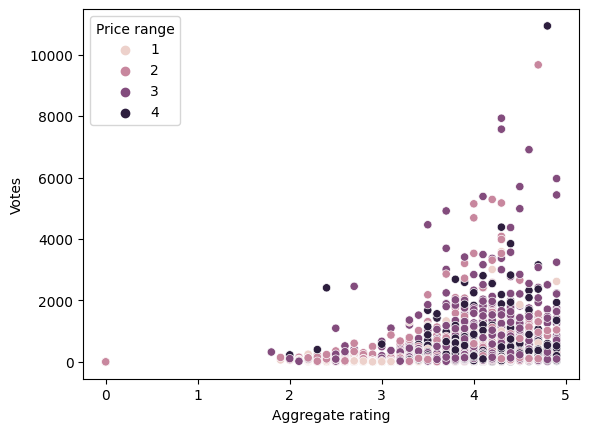

In [16]:

sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


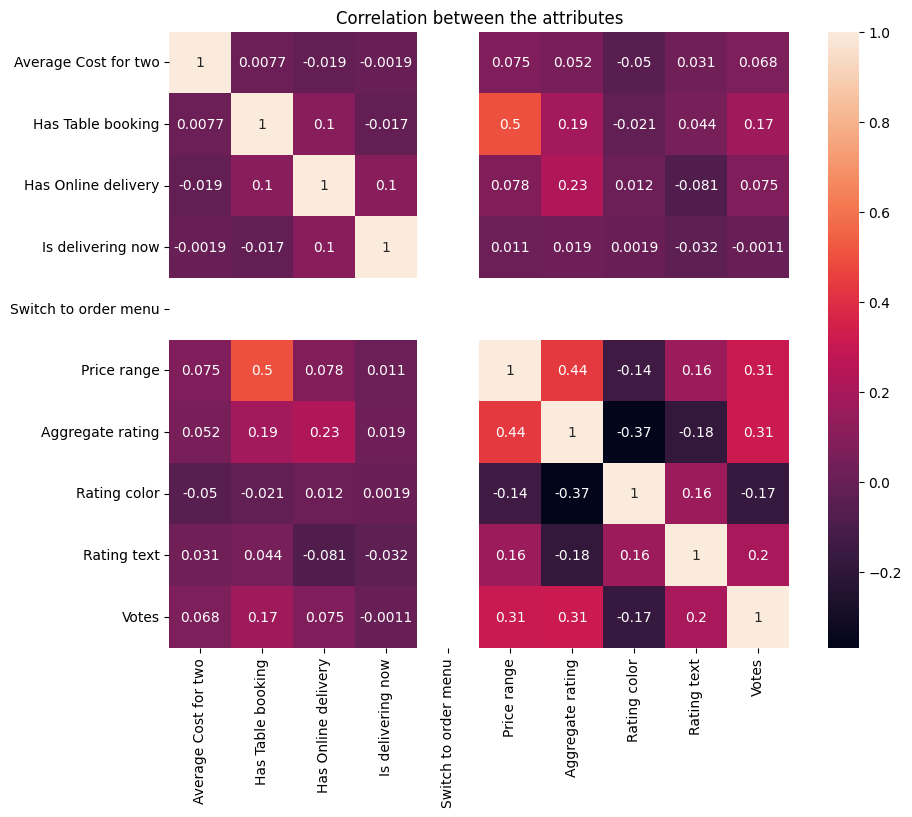

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [18]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [19]:
df['Aggregate rating'].mean()

2.665237895619367

In [20]:

# data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()

5883    3.8
5470    3.2
5790    0.0
5588    0.0
9283    4.1
Name: Aggregate rating, dtype: float64

In [21]:

print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (7633, 9)
x_test:  (1909, 9)
y_train:  (7633,)
y_test:  (1909,)


In [22]:
#training by linear regression algorithm
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)

In [23]:

#evaluating performance metrics of linear regression
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"MAE of the linear regression model is: {linreg_mae:.2f}")
print(f"MSE of the linear regression model is: {linreg_mse:.2f}")
print(f"R2 score of the linear regression model is: {linreg_r2:.2f}")
     

MAE of the linear regression model is: 1.00
MSE of the linear regression model is: 1.42
R2 score of the linear regression model is: 0.39


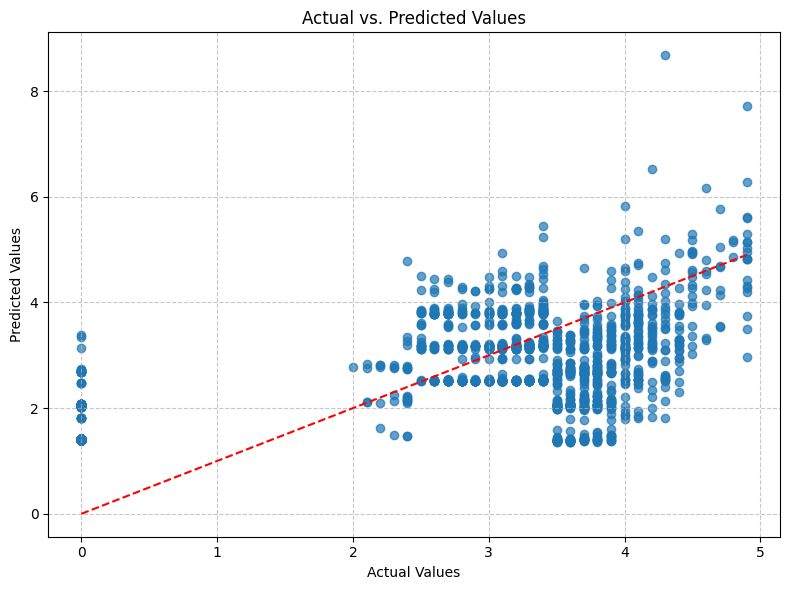

In [24]:
import matplotlib.pyplot as plt

# ... (Your existing code)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, linreg_pred, alpha=0.7)  # Actual vs. Predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Add a diagonal line for reference
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:

# training by decision tree regressor algorithm
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [26]:

#evaluating performance metrics of decision tree
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"MAE of the decision tree model is: {dtree_mae:.2f}")
print(f"MSE of the decision tree model is: {dtree_mse:.2f}")
print(f"R2 score of the decision tree model is: {dtree_r2:.2f}")

MAE of the decision tree model is: 0.15
MSE of the decision tree model is: 0.05
R2 score of the decision tree model is: 0.98


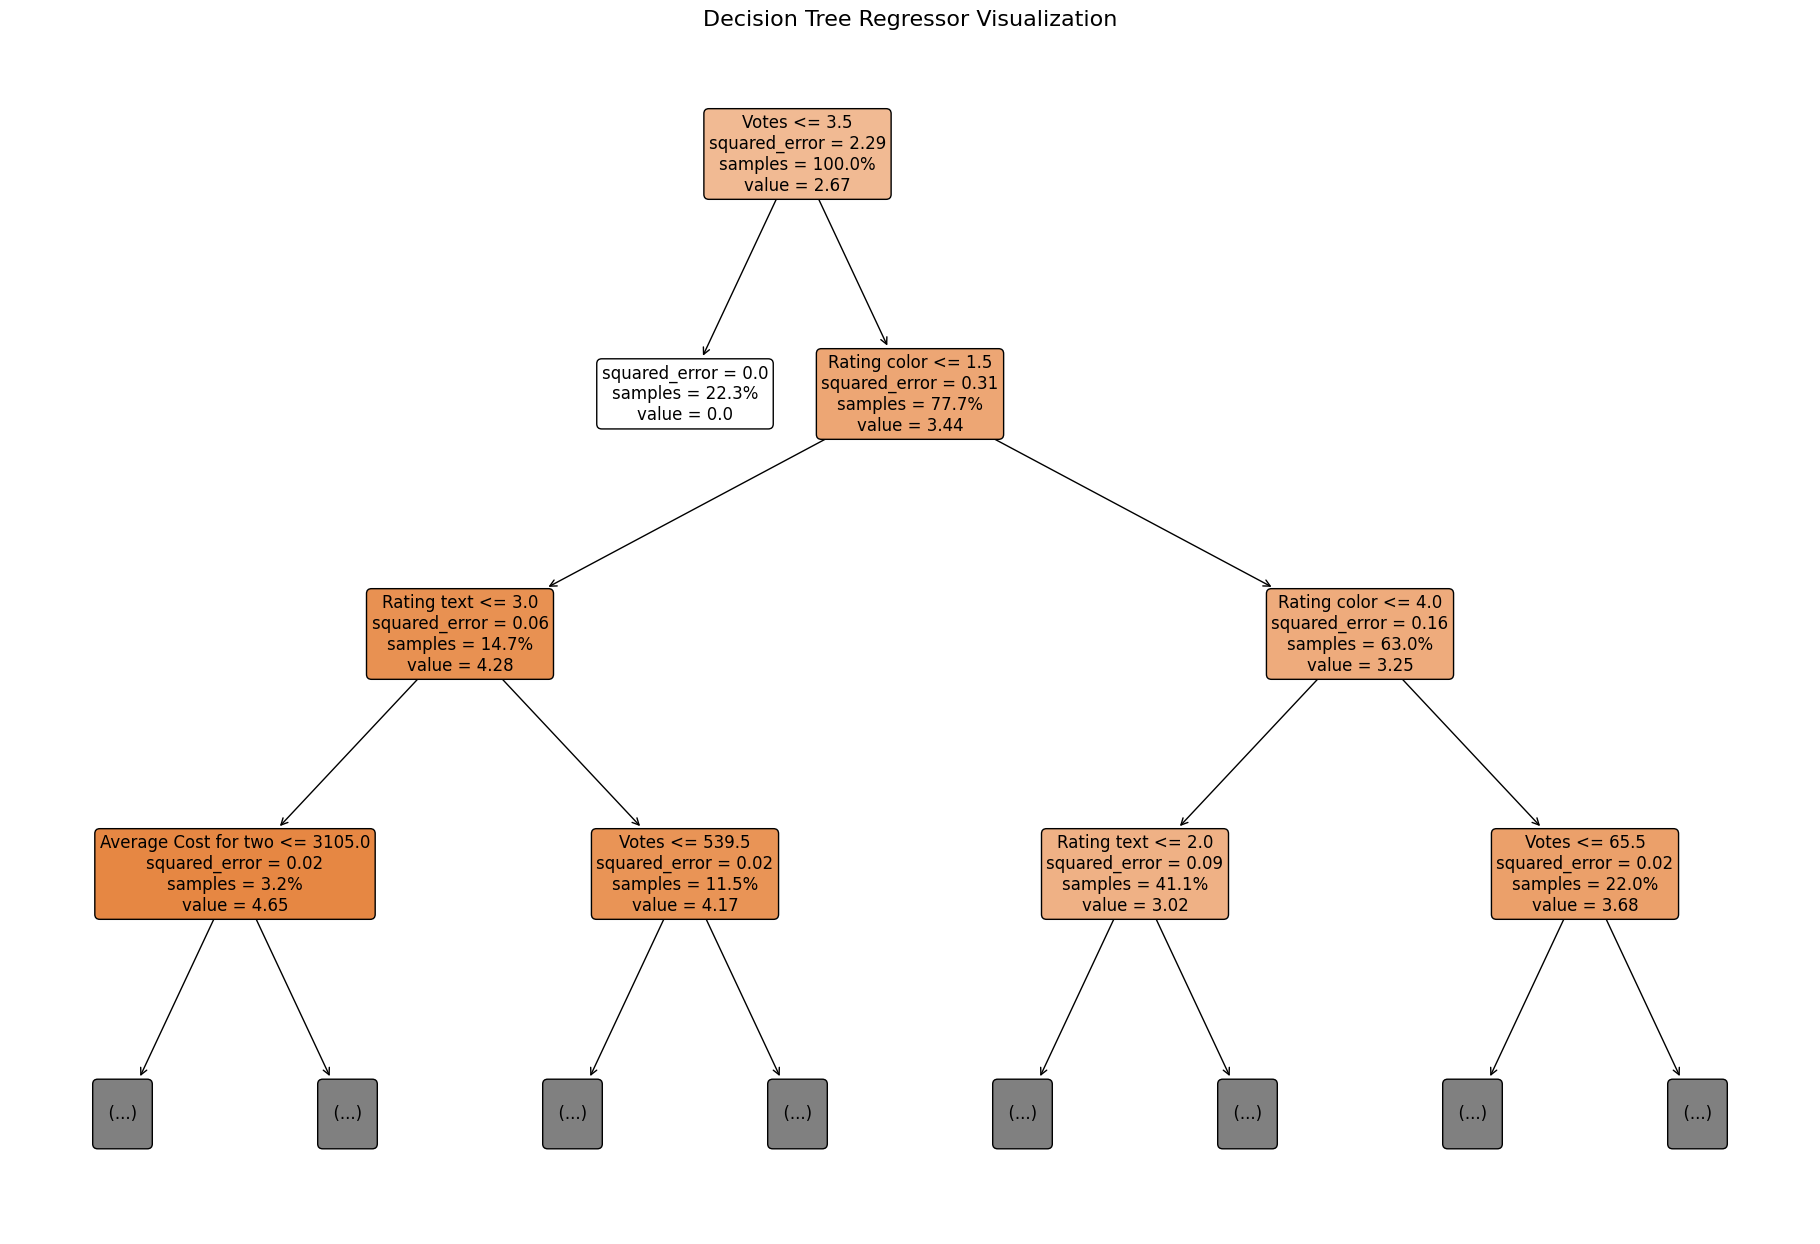

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# ... (Your existing code for training the DecisionTreeRegressor) ...

# 1. Visualize the decision tree with increased spacing

plt.figure(figsize=(20, 15))  # Increased figure size

plot_tree(dtree,
          filled=True,
          rounded=True,
          feature_names=x_train.columns if hasattr(x_train, 'columns') else None,
          class_names=None,
          max_depth=3,  # Adjust max_depth as needed
          fontsize=12,      # Slightly increased font size
          proportion=True,   # Show proportions instead of sample counts
          precision=2)      # Control decimal places in values

plt.title("Decision Tree Regressor Visualization", fontsize=16)

# Improve spacing around the tree
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1) # Adjust as needed

plt.show()


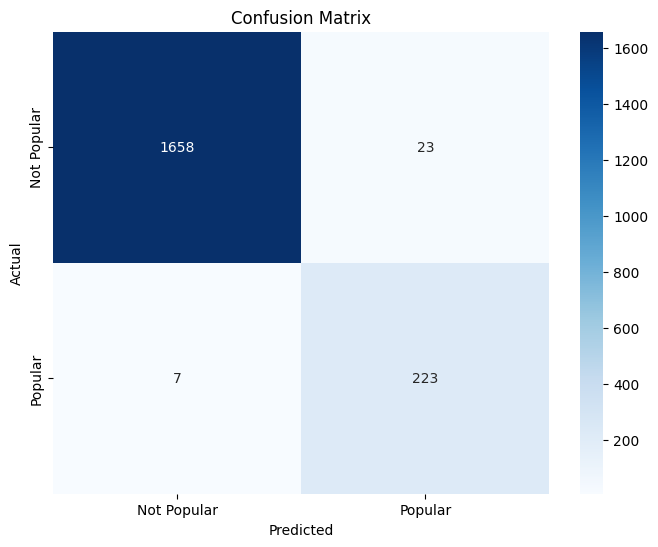

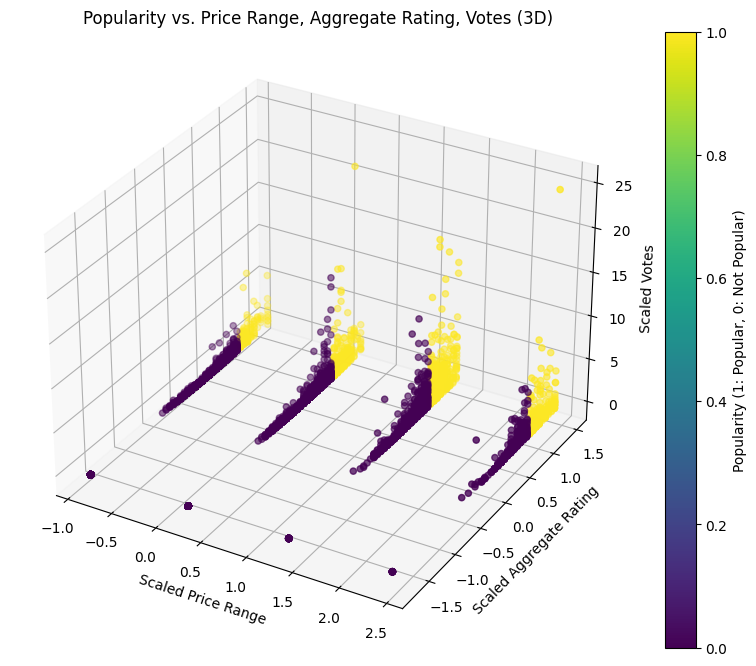

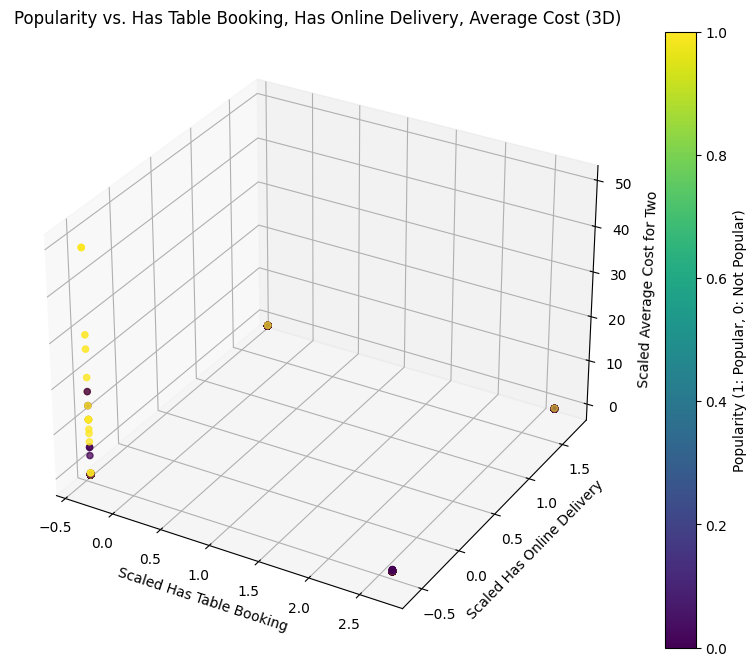

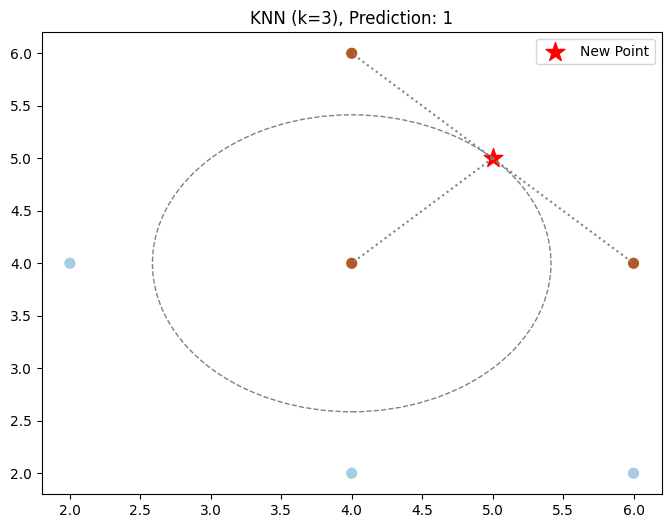

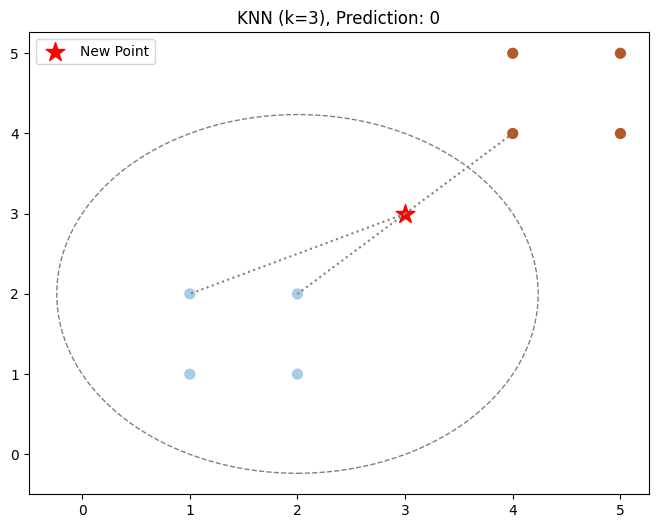

In [28]:
#KNN-classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv('/kaggle/input/restaurant/restaurants.csv')
df = pd.DataFrame(data)

# Define 'Popular' based on a threshold (example: rating > 4.0)
df['Popular'] = (df['Aggregate rating'] > 4.0).astype(int)

# Preprocessing
label_encoders = {}
categorical_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()

# All features for model training
features = ['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
X = df[features]
X_scaled = scaler.fit_transform(X)
y = df['Popular']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3D Scatter Plot 1: Price range, Aggregate rating, Votes
features1 = ['Price range', 'Aggregate rating', 'Votes']
X1 = df[features1]
X1_scaled = scaler.fit_transform(X1)

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(X1_scaled[:, 0], X1_scaled[:, 1], X1_scaled[:, 2], c=y, cmap='viridis')
ax1.set_xlabel('Scaled Price Range')
ax1.set_ylabel('Scaled Aggregate Rating')
ax1.set_zlabel('Scaled Votes')
ax1.set_title('Popularity vs. Price Range, Aggregate Rating, Votes (3D)')
plt.colorbar(scatter1, ax=ax1, label='Popularity (1: Popular, 0: Not Popular)')
plt.show()

# 3D Scatter Plot 2: Has Table booking, Has Online delivery, Average Cost for two
features2 = ['Has Table booking', 'Has Online delivery', 'Average Cost for two']
X2 = df[features2]
X2_scaled = scaler.fit_transform(X2)

fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
scatter2 = ax2.scatter(X2_scaled[:, 0], X2_scaled[:, 1], X2_scaled[:, 2], c=y, cmap='viridis')
ax2.set_xlabel('Scaled Has Table Booking')
ax2.set_ylabel('Scaled Has Online Delivery')
ax2.set_zlabel('Scaled Average Cost for Two')
ax2.set_title('Popularity vs. Has Table Booking, Has Online Delivery, Average Cost (3D)')
plt.colorbar(scatter2, ax=ax2, label='Popularity (1: Popular, 0: Not Popular)')
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def draw_knn_diagram(X, y, new_point, k=3):
    """Draws a KNN diagram with k=3."""

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Plot the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=50)

    # Plot the new point
    plt.scatter(new_point[0], new_point[1], marker='*', s=200, c='red', label='New Point')

    # Find the k-nearest neighbors
    distances, indices = knn.kneighbors([new_point])

    # Draw circles around the k-nearest neighbors
    for i in indices[0]:
        circle = plt.Circle((X[i, 0], X[i, 1]), distances[0][k-1], fill=False, edgecolor='gray', linestyle='--')
        plt.gca().add_patch(circle)
        break #Only draw one circle, the radius of the circle contains all k points.

    # Plot lines connecting the new point to its neighbors
    for i in indices[0]:
        plt.plot([new_point[0], X[i, 0]], [new_point[1], X[i, 1]], color='gray', linestyle=':')

    # Predict the class of the new point
    prediction = knn.predict([new_point])[0]
    plt.title(f'KNN (k=3), Prediction: {prediction}')
    plt.legend()
    plt.show()

# Example usage
X = np.array([[2, 4], [4, 2], [4, 4], [4, 6], [6, 2], [6, 4]])
y = np.array([0, 0, 1, 1, 0, 1])
new_point = np.array([5, 5])

draw_knn_diagram(X, y, new_point)

X2 = np.array([[1,1],[1,2],[2,1],[2,2],[4,4],[4,5],[5,4],[5,5]])
y2 = np.array([0,0,0,0,1,1,1,1])
new_point2 = np.array([3,3])

draw_knn_diagram(X2,y2,new_point2)

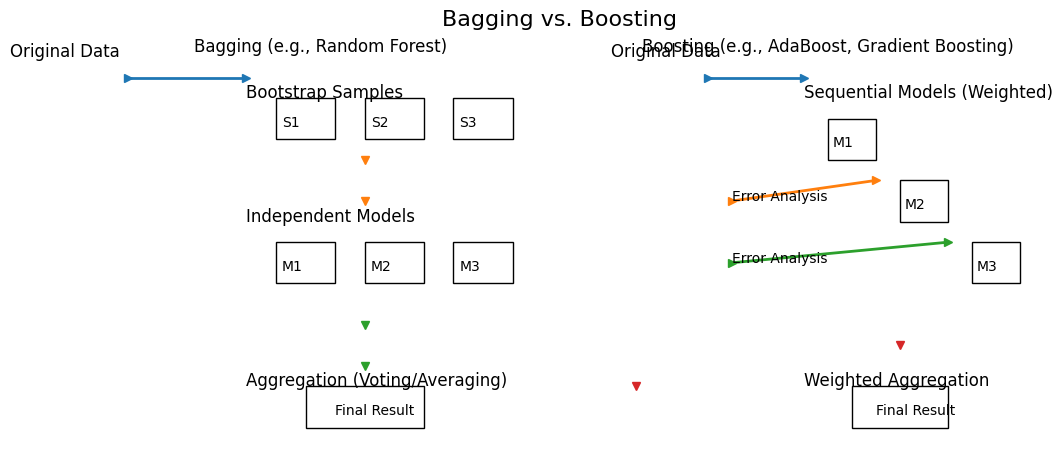

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def draw_bagging_boosting():
    """Draws a simplified diagram of Bagging and Boosting."""

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Bagging vs. Boosting", fontsize=16)

    # Bagging Diagram
    axes[0].set_title("Bagging (e.g., Random Forest)")
    axes[0].axis('off')

    # Data Source
    axes[0].text(0.1, 0.9, "Original Data", fontsize=12)
    axes[0].plot([0.3, 0.5], [0.85, 0.85], '->', linewidth=2)

    # Bootstrapping
    axes[0].text(0.5, 0.8, "Bootstrap Samples", fontsize=12)
    for i in range(3):
        axes[0].add_patch(plt.Rectangle((0.55 + i * 0.15, 0.7), 0.1, 0.1, fill=False, edgecolor='black'))
        axes[0].text(0.56 + i * 0.15, 0.73, f"S{i+1}", fontsize=10)

    axes[0].plot([0.7, 0.7], [0.65, 0.55], 'v', linewidth=2)

    # Independent Models
    axes[0].text(0.5, 0.5, "Independent Models", fontsize=12)
    for i in range(3):
        axes[0].add_patch(plt.Rectangle((0.55 + i * 0.15, 0.35), 0.1, 0.1, fill=False, edgecolor='black'))
        axes[0].text(0.56 + i * 0.15, 0.38, f"M{i+1}", fontsize=10)

    axes[0].plot([0.7, 0.7], [0.25, 0.15], 'v', linewidth=2)

    # Aggregation
    axes[0].text(0.5, 0.1, "Aggregation (Voting/Averaging)", fontsize=12)
    axes[0].add_patch(plt.Rectangle((0.6, 0.0, 0.2, 0.1), 0.2, 0.1, fill=False, edgecolor='black'))
    axes[0].text(0.65, 0.03, "Final Result", fontsize=10)

    # Boosting Diagram
    axes[1].set_title("Boosting (e.g., AdaBoost, Gradient Boosting)")
    axes[1].axis('off')

    # Original Data
    axes[1].text(0.1, 0.9, "Original Data", fontsize=12)
    axes[1].plot([0.3, 0.5], [0.85, 0.85], '->', linewidth=2)

    # Sequential Models with Feedback
    axes[1].text(0.5, 0.8, "Sequential Models (Weighted)", fontsize=12)

    # First Model
    axes[1].add_patch(plt.Rectangle((0.55, 0.65), 0.1, 0.1, fill=False, edgecolor='black'))
    axes[1].text(0.56, 0.68, "M1", fontsize=10)

    # Error Feedback
    axes[1].text(0.35, 0.55, "Error Analysis", fontsize=10)
    axes[1].plot([0.65, 0.35], [0.6, 0.55], '->', linewidth=2)

    # Second Model (Weighted based on errors)
    axes[1].add_patch(plt.Rectangle((0.7, 0.5), 0.1, 0.1, fill=False, edgecolor='black'))
    axes[1].text(0.71, 0.53, "M2", fontsize=10)

    # Error Feedback
    axes[1].text(0.35, 0.4, "Error Analysis", fontsize=10)
    axes[1].plot([0.8, 0.35], [0.45, 0.4], '->', linewidth=2)

    # Third Model (Weighted based on previous errors)
    axes[1].add_patch(plt.Rectangle((0.85, 0.35), 0.1, 0.1, fill=False, edgecolor='black'))
    axes[1].text(0.86, 0.38, "M3", fontsize=10)

    axes[1].plot([0.7, 0.15], [0.2, 0.1], 'v', linewidth=2)

    # Weighted Aggregation
    axes[1].text(0.5, 0.1, "Weighted Aggregation", fontsize=12)
    axes[1].add_patch(plt.Rectangle((0.6, 0.0, 0.2, 0.1), 0.2, 0.1, fill=False, edgecolor='black'))
    axes[1].text(0.65, 0.03, "Final Result", fontsize=10)

    plt.show()

draw_bagging_boosting()

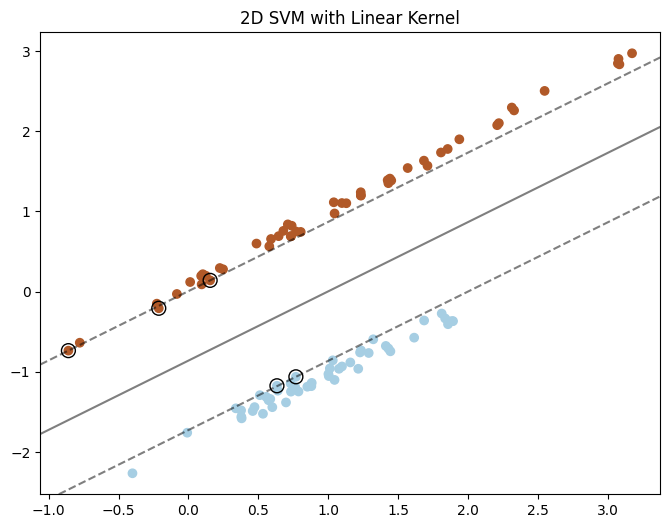

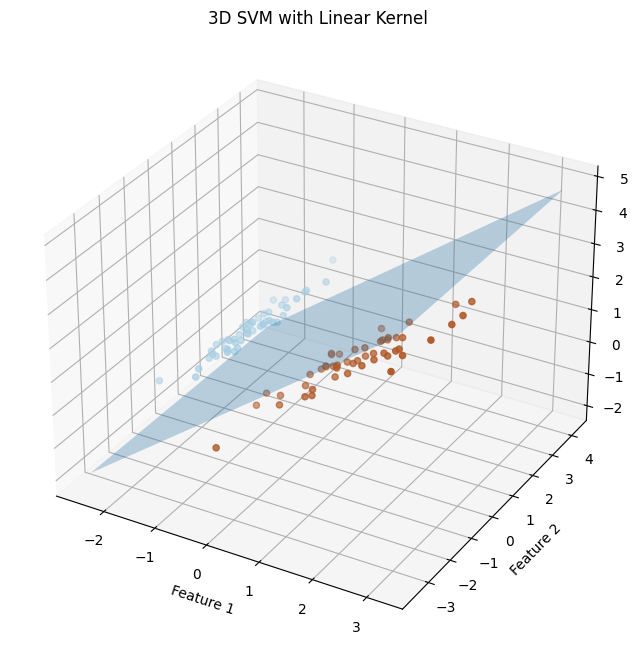

In [30]:

            #import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X_2d, y_2d = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                 n_clusters_per_class=1, random_state=42)
X_3d, y_3d = make_classification(n_samples=100, n_features=3, n_redundant=0,
                                 n_clusters_per_class=1, random_state=42)

# 2D SVM
svm_2d = svm.SVC(kernel='linear')
svm_2d.fit(X_2d, y_2d)

# 3D SVM (Linear Kernel)
svm_3d = svm.SVC(kernel='linear')
svm_3d.fit(X_3d, y_3d)

# 2D Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.Paired)

# Plotting decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.title("2D SVM with Linear Kernel")
plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_3d, cmap=plt.cm.Paired)

# Plotting decision plane (for linear kernel)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = lambda x, y: (-svm_3d.coef_[0][0] * x - svm_3d.coef_[0][1] * y - svm_3d.intercept_[0]) / svm_3d.coef_[0][2]
zz = Z(xx, yy)

ax.plot_surface(xx, yy, zz, alpha=0.3)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title("3D SVM with Linear Kernel")
plt.show()